<div style="padding:20px;
            color:black;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700">Customer Personality Analysis</div>

**DataSet Link : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis**

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span> Data Overview</div>

### `Import Libraries`

In [1]:
## main Libraries
import numpy as np
import pandas as pd

## Datetime , i will need it in feature engineering step
from datetime import date

## Vis. Libraries
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot
from yellowbrick.cluster import KElbowVisualizer

## preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, RobustScaler

## decomposition
from sklearn.decomposition import PCA

## CLustering
from sklearn.cluster import KMeans ##, AgglomerativeClustering
## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## setting some Libraries
pd.set_option('display.max_columns', None)
sns.set(rc={"figure.figsize" : [12,8]}, font_scale=1.2 , style='darkgrid')
## Set the figure and axes face color
sns.set(rc={"axes.facecolor": "#FFE4D9", "figure.facecolor": "#FFE4D9"})
## custom palette
custom_palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
sns.set_palette(custom_palette)
pio.templates.default = "ggplot2"
init_notebook_mode(connected=True)

### `Load Data`

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Data Description : </b> The data consists of 2240 rows and 29 columns </div>

### `Statistical information about the data`

In [5]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


#### `Note :`
    - Income : mean almost equal 52247 and min value equal 1730 and max value equal 666666
               The outliers here may be due to the difference in education level of each customer
    - Year_Birth : mean almost equal 1969 and min equal 1893 and max equal 1996 
    - age : mean equal 54 
    - Kidhome : min equal 0 (They have no children) and max equal 2
    - Teenhome : min equal 0 (They don't have teens) and max equal 2 
    - Customers spend more on meat products
    - Customers spend least on fruits products

In [6]:
df.describe(include="O").T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


#### `Note :`
    - Education Feature : mode is Graduation and has 5 unique values
    - Marital_Status Feature : mode is Married and has 8 unique values

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span> Data Preprocessing
</div>

<a id="1.7"></a>
## <b>2.1 <span style='color:#682F2F'>Data Cleaning</span></b>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note : </b>Dt_Customer Column Data type is Object, I will Convert it to Datatime Datatype.</div>

In [8]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y", errors="coerce")
## 'coerce' invalid parsing will be set as NaT.

In [9]:
df["Dt_Customer"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


### `Null Values`

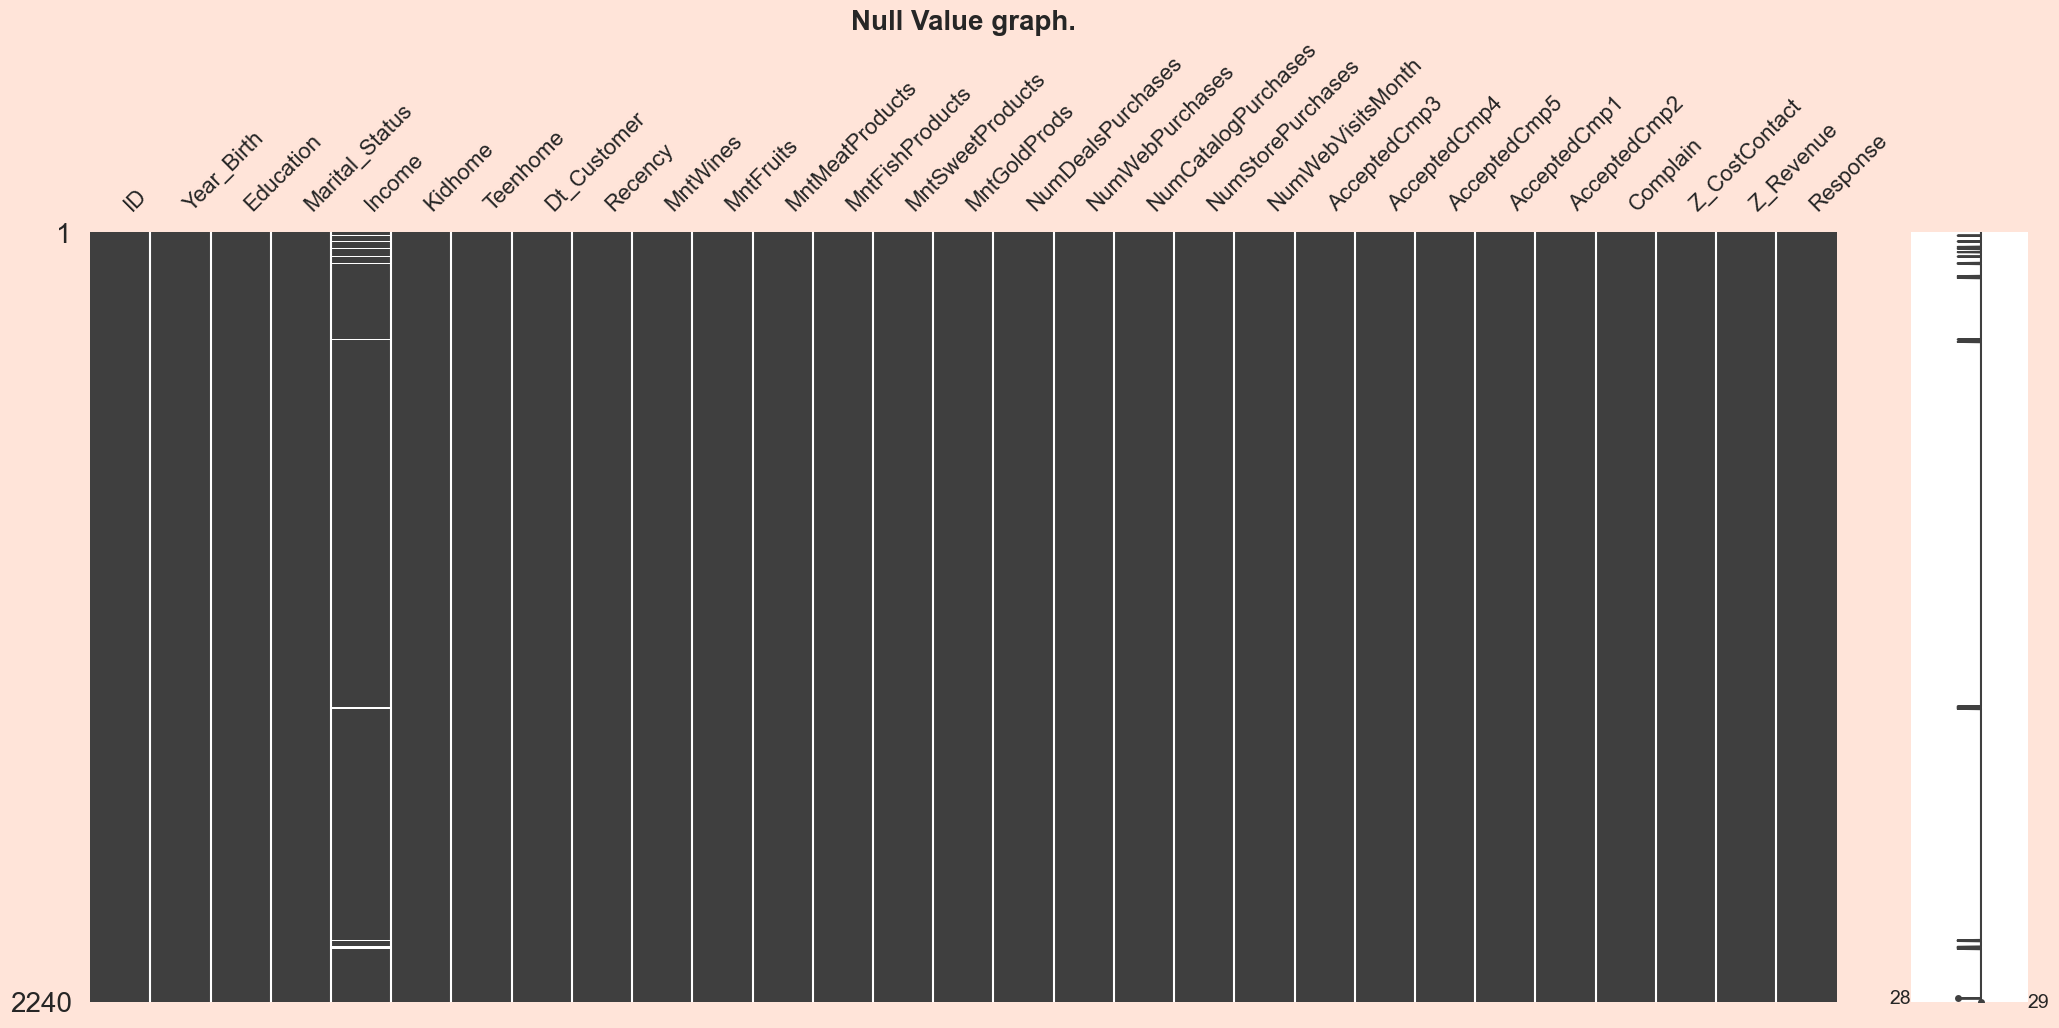

In [10]:
msno.matrix(df) 
plt.title("Null Value graph.", fontsize=20, weight="bold")
plt.show()

In [11]:
(df.isna().sum() / df.shape[0]) * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

##### `Income Column has Missing Values`

In [12]:
df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

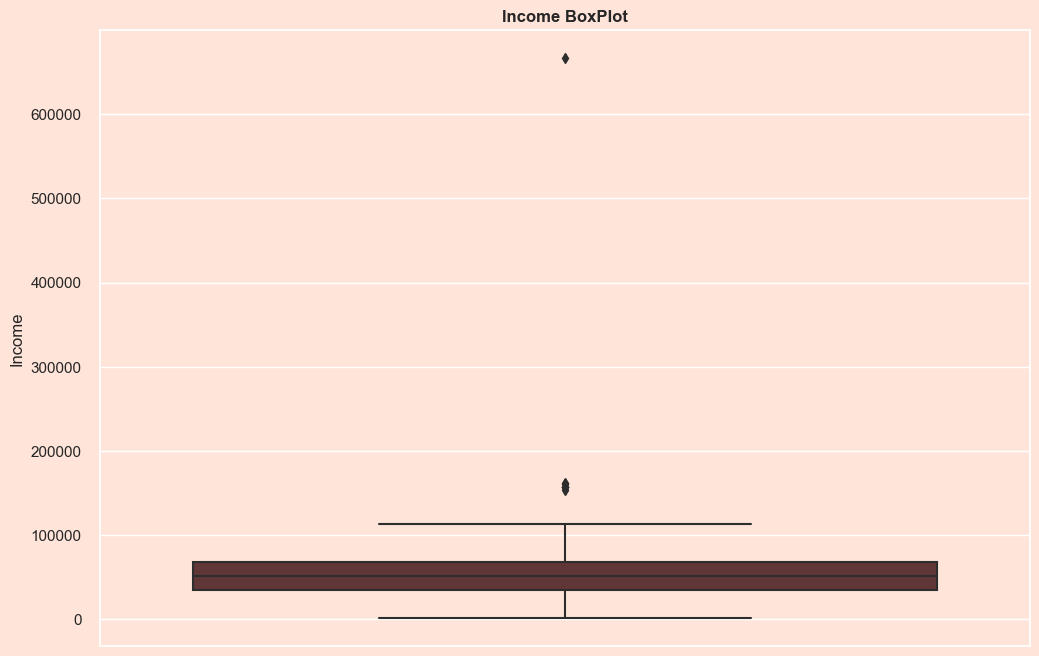

In [13]:
sns.boxplot(y="Income", data=df)
plt.title("Income BoxPlot", weight="bold")
plt.show()

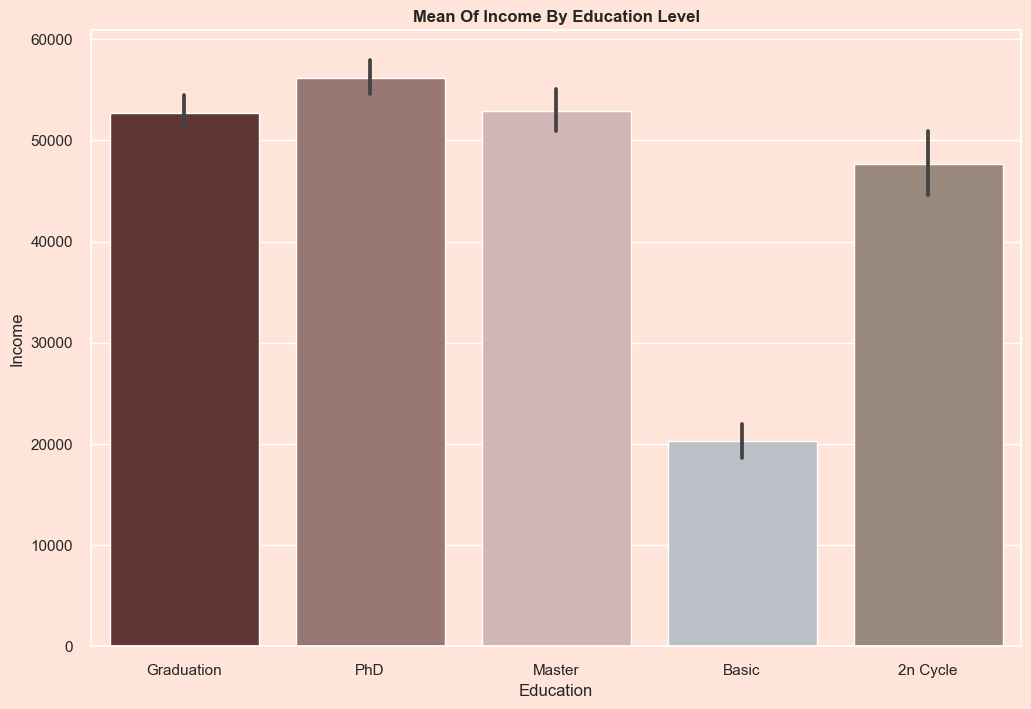

In [14]:
sns.barplot(x="Education", y="Income", data=df)
plt.title("mean of Income by Education level".title() , weight="bold")
plt.show()

### `Imputing by Sub-Group`

In [15]:
income_imputer = df.groupby("Education")["Income"].median().to_dict()
income_imputer

{'2n Cycle': 46805.0,
 'Basic': 20744.0,
 'Graduation': 52028.5,
 'Master': 50943.0,
 'PhD': 55212.0}

In [16]:
df["Income"] = df["Income"].fillna(df["Income"].map(income_imputer))

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note : </b> i filled Missing Values in Income Column with median by Education Level as Sub-Group. i did it because there is outliers and Income varies depending on the level of education.</div>

### `Duplicated`

In [17]:
df.duplicated().sum()

0

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:25%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note : </b> No Duplicate Values.. </div>

<a id="1.7"></a>
## <b>2.2 <span style='color:#682F2F'>Feature Engineering (Extraction) and Data Preparation</span></b>

In [18]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1774,2694,1967,Graduation,Married,42664.0,0,1,2014-03-18,44,21,0,3,0,0,0,1,1,0,3,6,0,0,0,0,0,0,3,11,0
778,2461,1955,Master,Single,51124.0,1,1,2013-12-18,79,26,1,11,0,1,4,2,1,0,3,3,0,0,0,0,0,0,3,11,0
2116,87,1981,2n Cycle,Married,27733.0,1,0,2013-08-26,16,0,7,5,26,2,17,2,2,0,3,7,0,0,0,0,0,0,3,11,0
968,2620,1974,PhD,Married,34596.0,1,0,2013-04-13,48,14,0,2,0,0,7,1,1,0,2,8,0,0,0,0,0,0,3,11,1
484,9286,1960,Master,Together,83151.0,0,0,2012-10-10,93,407,28,100,120,74,18,1,5,9,4,3,0,0,0,0,0,0,3,11,0


In [19]:
data = df.copy()

In [20]:
## age feature creation
data['Age'] = 2023 - data['Year_Birth']

In [21]:
## Spending feature creation
data['spending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] \
                        + data['MntSweetProducts'] + data['MntGoldProds']

In [22]:
## Seniority feature creation
last_date = date(2023,9, 10)

def seniority(x):
    return last_date - x

data['Seniority'] = pd.to_numeric(data['Dt_Customer'].dt.date.apply(seniority).dt.days, downcast='integer')/365

In [23]:
## rename some cols
data=data.rename(columns={'NumWebPurchases': 'Web','NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})

In [24]:
data["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [25]:
## Matrial Status, i will  convert to 2 unique values .. 
## Alone ==> Divorced, Single, Absurd, Widow , YOLO.
## In couple ==> Married, Together.
data["Marital_Status"] = data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

In [26]:
data["Marital_Status"].nunique()

2

In [27]:
print(f"Education column number of unique value : {data['Education'].nunique()}")
print(f"Education column unique value : {data['Education'].unique()}")

Education column number of unique value : 5
Education column unique value : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [28]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [29]:
## Education column , i will  convert to 2 unique values .. 
## ungrad. ==> Basic, 2n Cycle .
## postgrad. ==> Graduation, Master, PhD.
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [30]:
print(f"after update , Education column number of unique value : {data['Education'].nunique()}")
print(f"after update , Education column unique value : {data['Education'].unique()}")

after update , Education column number of unique value : 2
after update , Education column unique value : ['Postgraduate' 'Undergraduate']


In [31]:
print(f"num of unique value in kidhome : {data['Kidhome'].nunique()}")
print(f"num of unique value in Teenhome : {data['Teenhome'].nunique()}")

num of unique value in kidhome : 3
num of unique value in Teenhome : 3


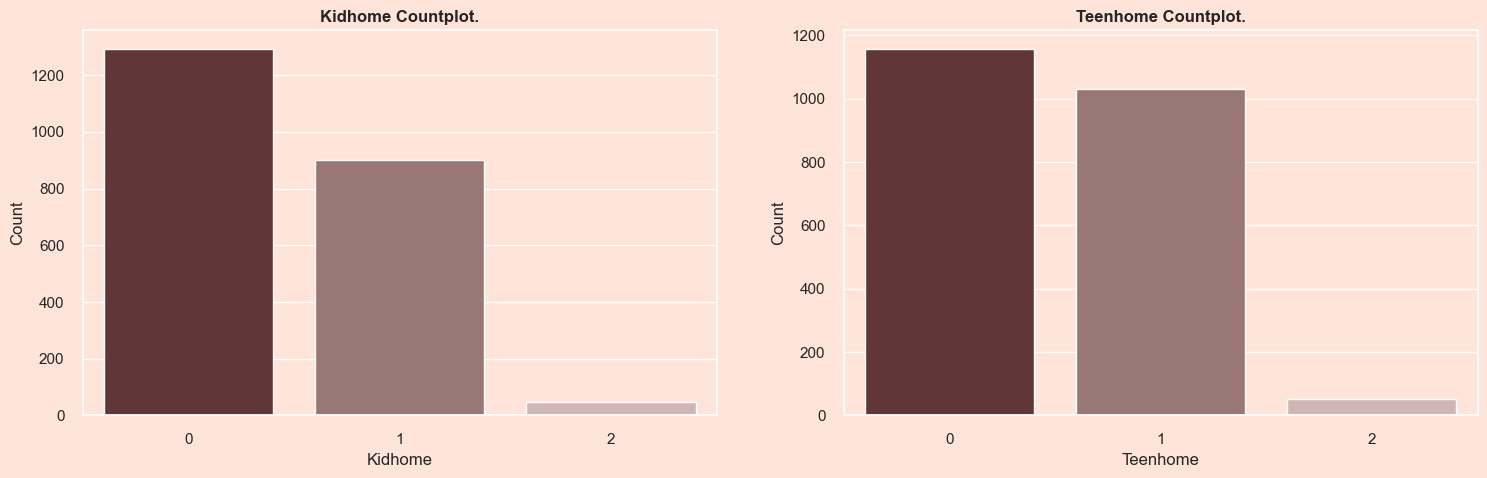

In [32]:
used_cols = ["Kidhome", "Teenhome"]

fig, ax = plt.subplots(1, 2, figsize = (18,5))

for i in range(2):
    sns.countplot(ax=ax[i], data=data, x=used_cols[i])
    ax[i].set_title(f"{used_cols[i]} Countplot.", weight="bold")
    ax[i].set_ylabel("Count")

plt.show()

In [33]:
## Children feature creation
data['Children'] = data['Kidhome'] + data['Teenhome']

In [34]:
def has_chid_or_no(x):
    if x > 0:
        return "Has child"
    else :
        return "no child"
    
data['Has_child'] = data["Children"].apply(has_chid_or_no)

In [35]:
data['Has_child'].value_counts()

Has child    1602
no child      638
Name: Has_child, dtype: int64

In [36]:
data['Children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)

In [37]:
data['Children'].value_counts()

1 child       1128
No child       638
2 children     421
3 children      53
Name: Children, dtype: int64

In [38]:
## rename some cols
data = data.rename(columns={'MntWines': "Wines",
                            'MntFruits':'Fruits',
                            'MntMeatProducts':'Meat',
                            'MntFishProducts':'Fish',
                            'MntSweetProducts':'Sweets',
                            'MntGoldProds':'Gold',
                            'NumDealsPurchases':'Deals'})


In [39]:
data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sample(5)
## Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
1547,0,0,0,0,0,1
38,0,0,0,0,0,0
1416,0,0,0,0,0,0
1559,0,0,0,0,0,0
1081,0,0,0,0,0,1


In [40]:
## Campaigns_Accepted feature creation
data['Campaigns_Accepted'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [41]:
data['Campaigns_Accepted'].value_counts().to_frame()

,Campaigns_Accepted
0,1777
1,325
2,83
3,44
4,11


In [42]:
## drop some features
drop_list =['ID', 'Year_Birth' ,'Kidhome','Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact','Z_Revenue']
data.drop(drop_list, inplace=True, axis=1)
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_Accepted'],
      dtype='object')

In [43]:
## rename columns 
data.columns = data.columns.str.capitalize()

##### `NOW , We Have New Feature`

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span> EDA & Data Analysis
</div>

<a id="1.7"></a>
## <b>3.1 <span style='color:#682F2F'>Univariate Analysis</span></b>
###### `- explores each variable in a data set, separately.`

In [44]:
data.sample(3)

,Education,Marital_status,Income,Dt_customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals,Web,Catalog,Store,Numwebvisitsmonth,Complain,Response,Age,Spending,Seniority,Children,Has_child,Campaigns_accepted
759,Postgraduate,In couple,38829.0,2014-04-06,86,76,0,7,0,0,16,1,3,2,2,5,0,0,64,99,9.435616,1 child,Has child,0
2161,Postgraduate,In couple,62994.0,2014-03-04,74,224,12,48,4,12,12,1,6,2,4,6,0,0,43,312,9.526027,1 child,Has child,0
1679,Postgraduate,In couple,33228.0,2014-01-23,28,22,2,31,7,4,5,1,2,0,3,7,0,0,43,71,9.635616,1 child,Has child,0


###### 'Age Column'

In [45]:
np.floor(data["Age"].describe()).to_frame()

,Age
count,2240.0
mean,54.0
std,11.0
min,27.0
25%,46.0
50%,53.0
75%,64.0
max,130.0


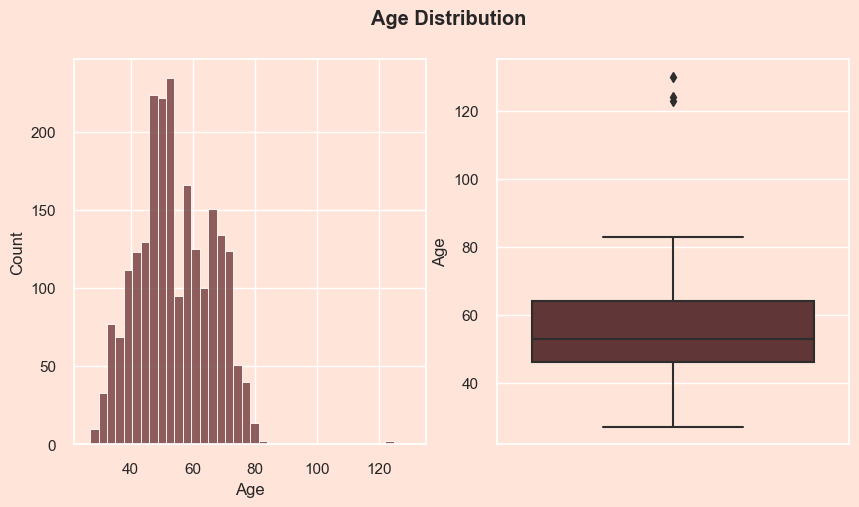

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
sns.histplot(ax=ax[0], data=data, x="Age")
sns.boxplot(ax=ax[1], data=data, y="Age")
fig.suptitle('Age Distribution', weight="bold")
plt.show()

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:40%;
                                                 margin: auto;
                                                 text-align: left;">
<b>NOTE : </b>Age column have outliers, let's handle it.</div>

In [47]:
## replace outliers with mean value
age_mean = data['Age'].mean()
data.loc[data['Age'] > 83,'Age'] = age_mean

In [48]:
np.floor(data["Age"].describe()).to_frame()

,Age
count,2240.0
mean,54.0
std,11.0
min,27.0
25%,46.0
50%,53.0
75%,64.0
max,83.0


In [49]:
fig = px.histogram(data["Age"], marginal="box", title="<b>Age Distribution After Handling Outliers",
                   color_discrete_map={"Age":"darkred"})
fig.show()

print(f"Skewness of Age Distribution is {data['Age'].skew()}")

Skewness of Age Distribution is 0.09329573397028006


###### `The ages of customers range from 11 to 83, and the average age is equal to 54`

###### 'Income Column'
- Customer's yearly household income

In [50]:
data['Income'].describe().to_frame()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


The average income is 52247.25 and the min income value is 1730

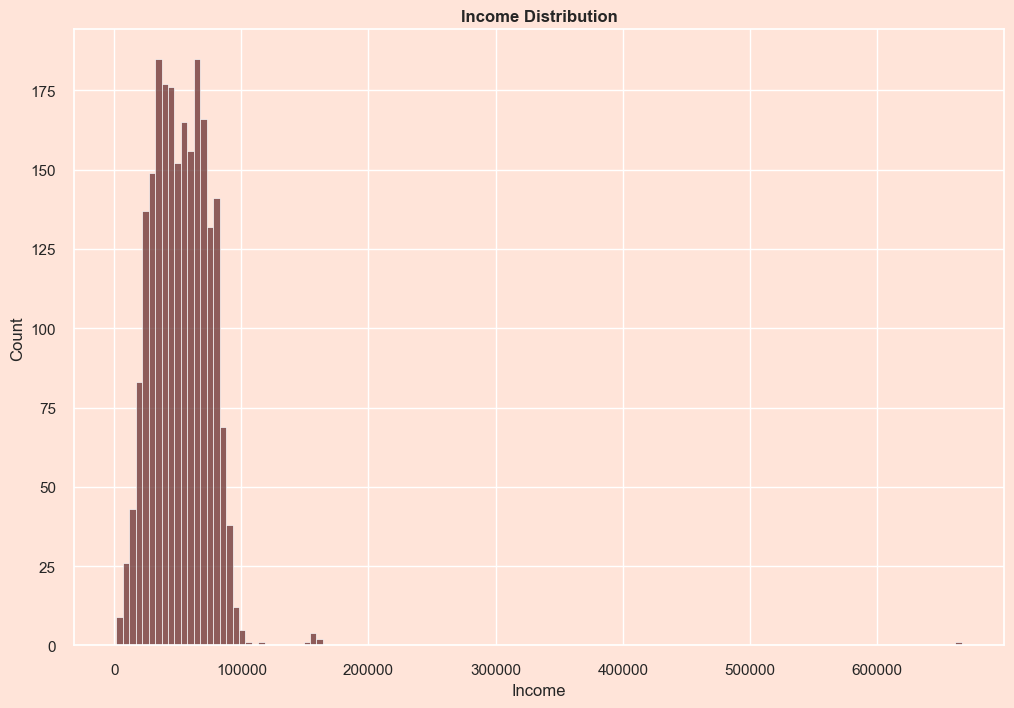

In [51]:
sns.histplot(data=data, x="Income")
plt.title("Income Distribution", weight="bold")
plt.show()

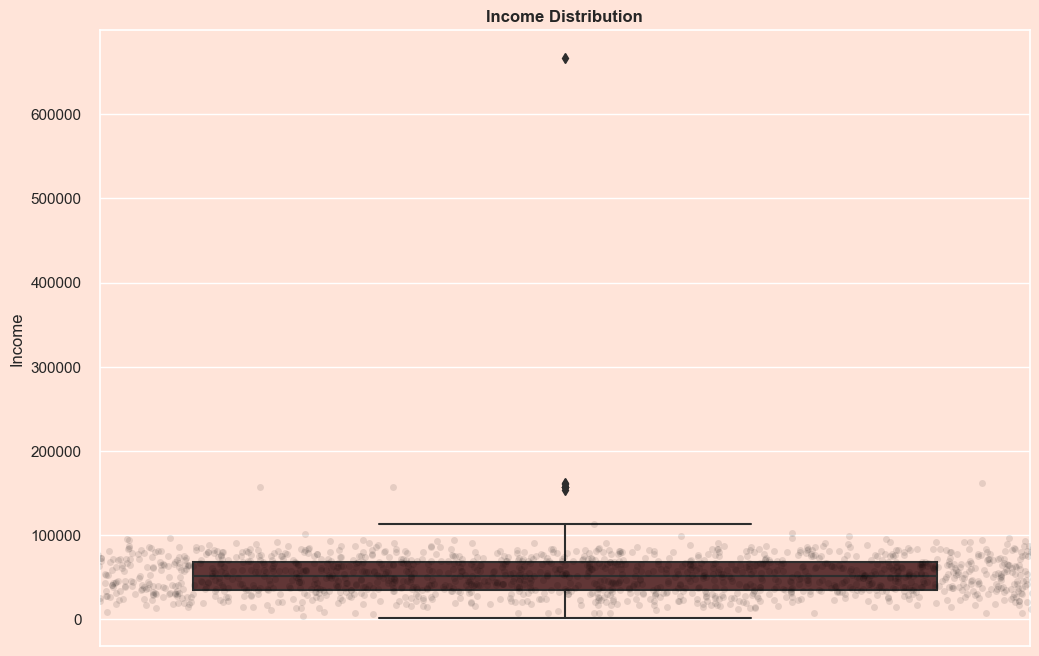

In [52]:
sns.boxplot(data=data, y="Income")
sns.stripplot(data=data, y="Income", jitter=0.8, alpha=0.1, color='black')
plt.title("Income Distribution", weight="bold")
plt.show()

In [53]:
data.shape

(2240, 24)

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:40%;
                                                 margin: auto;
                                                 text-align: left;">
<b>NOTE : </b>Income column have outliers, let's handle it.</div>

In [54]:
## drop outliers
data = data.loc[(data["Income"] <= 200000)]
## reset index after drop outliers
data.reset_index(drop=True, inplace=True)
print(f'Shape After Drop Outliers : {data.shape}')
print(f'Statistics Info. about Income : \n{data["Income"].describe()}')

Shape After Drop Outliers : (2215, 24)
Statistics Info. about Income : 
count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64


In [55]:
fig = px.histogram(data["Income"], marginal="box", title="<b>Income Distribution After Handling Outliers",
                  color_discrete_map={"Income":"darkred"})
fig.show()

print(f"Skewness of Income Distribution is {data['Income'].skew()}")

Skewness of Income Distribution is 0.34734967591402816


##### 'Seniority Column'
- The customer has been dealing with the company for how many years

In [56]:
data['Seniority'].describe()

count    2215.000000
mean       10.173983
std         0.554736
min         9.205479
25%         9.698630
50%        10.178082
75%        10.654795
max        11.120548
Name: Seniority, dtype: float64

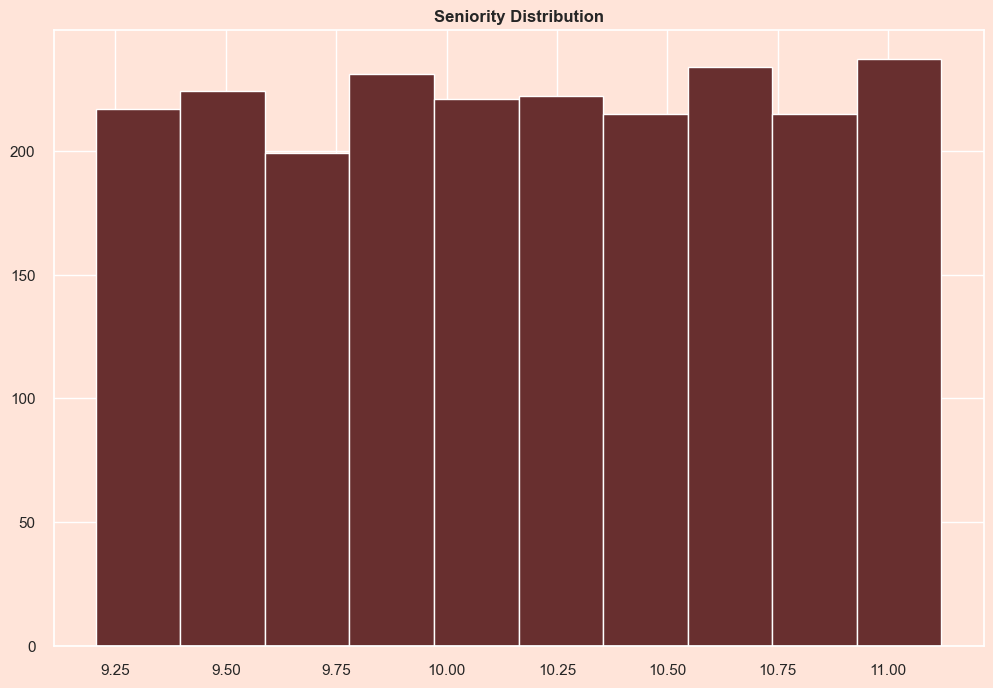

In [57]:
plt.hist(x=data["Seniority"])
plt.title("Seniority Distribution", weight="bold")
plt.show()

### 'Products'
- ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
- Amount spent in last 2 years

In [58]:
products = data[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]
products.describe()

,Wines,Fruits,Meat,Fish,Sweets,Gold
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,305.225282,26.361625,167.063205,37.651016,27.040632,43.979684
std,337.345380,39.802036,224.311559,54.760822,41.077594,51.822660
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,175.000000,8.000000,68.000000,12.000000,8.000000,25.000000
75%,505.000000,33.000000,232.500000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000



<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> - Right Skewed (Positive) in ALL PRODUCTS: The mean is greater than the median</div>

In [59]:
data[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].sum()

Wines     676074
Fruits     58391
Meat      370045
Fish       83397
Sweets     59895
Gold       97415
dtype: int64

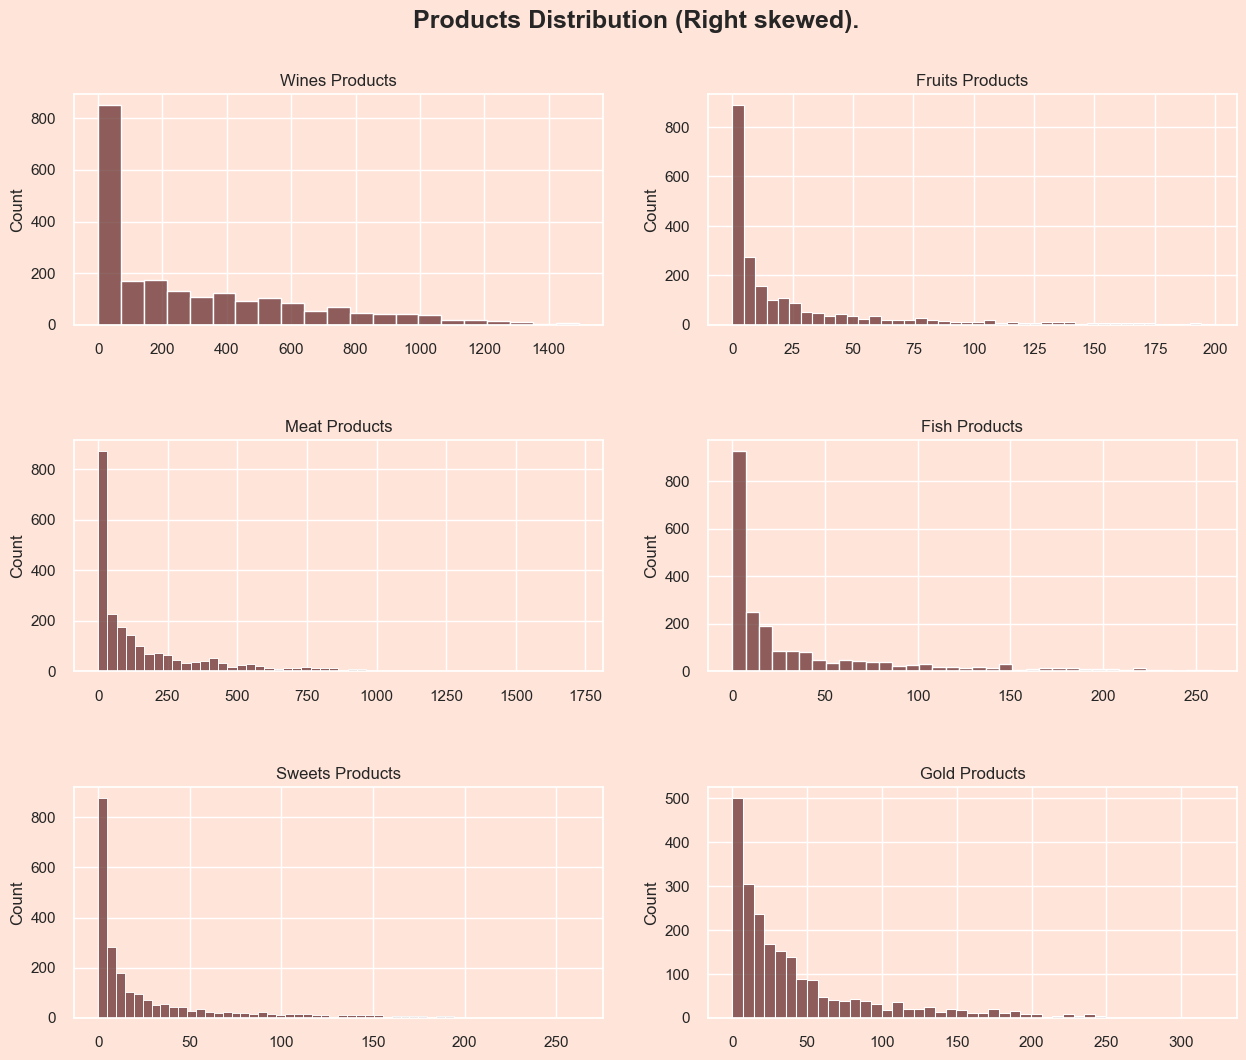

In [60]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Products Distribution (Right skewed).", fontsize=18, y=0.95, weight="bold")



for i, product in enumerate(products.columns.tolist()):
    
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    sns.histplot(ax=ax, data=products, x=products[product])
    
    # chart formatting
    ax.set_title(f"{product} Products")
    ax.set_xlabel("")

plt.show()

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note : </b> Distribution plots indicate skewed to the right distributions of features. Thus, it is crucial to avoid assuming that a product (e.g., Wines, meats) is the top-selling. </div>

###### 'Spending Columns'

In [61]:
data["Spending"].describe().to_frame()

,Spending
count,2215.000000
mean,607.321445
std,602.925291
min,5.000000
25%,69.000000
50%,397.000000
75%,1048.000000
max,2525.000000



<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> - Right Skewed (Positive) in ALL PRODUCTS: The mean is greater than the median</div>

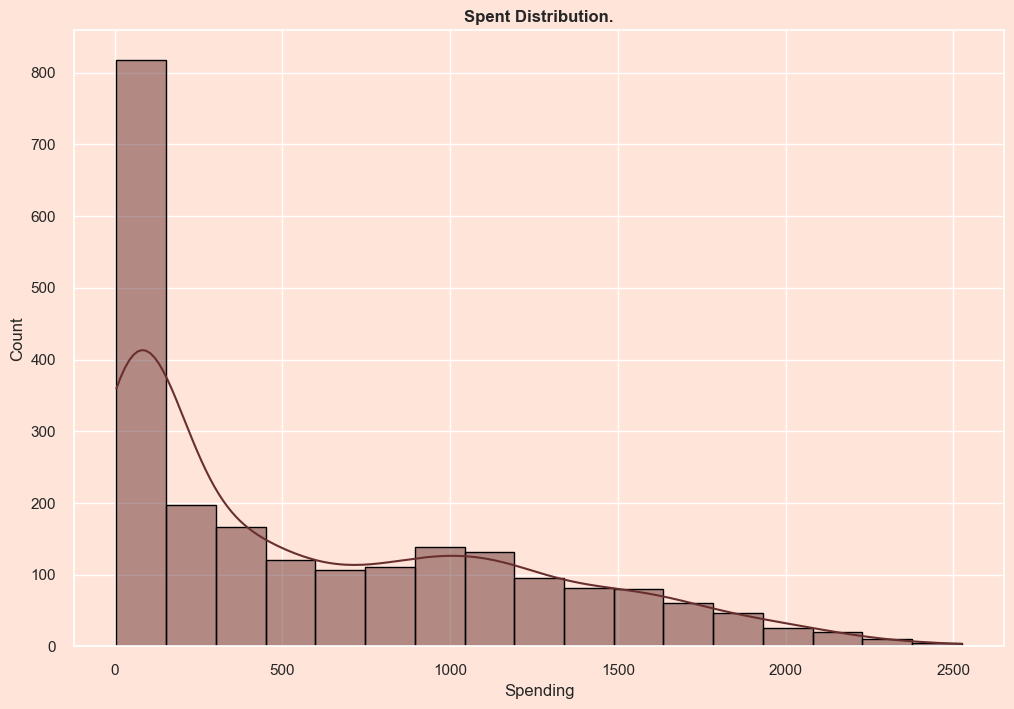

In [62]:
sns.histplot(data=data, x="Spending", kde=True, edgecolor="black")
plt.title("Spent Distribution.", weight="bold")
plt.show()


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> More than 50% of customers spend less than 10000$ </div>

##### 'Education Column'

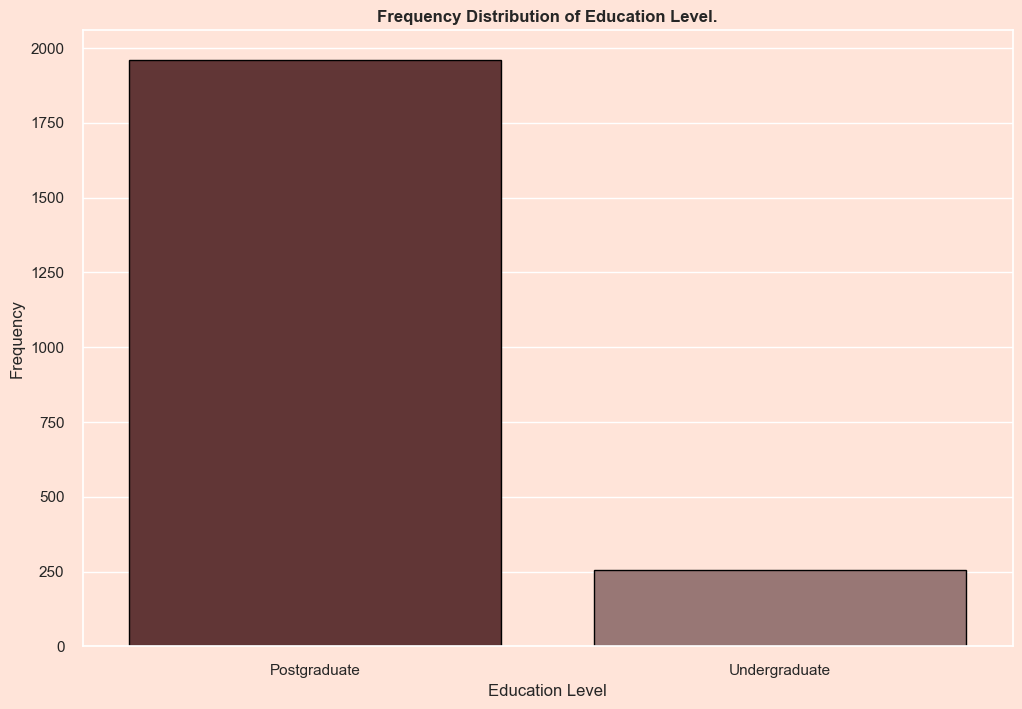

In [63]:
sns.countplot(data=data, x="Education",edgecolor="black")
plt.title("Frequency Distribution of Education Level.", weight="bold")
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.show()

In [64]:
pd.DataFrame({"Count" : data["Education"].value_counts(),
              "Ratio" : round(data["Education"].value_counts(normalize=True),2)*100})

,Count,Ratio
Postgraduate,1961,89.0
Undergraduate,254,11.0



<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:30%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The majority is Postgraduate, 89%. </div>

In [65]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted'],
      dtype='object')

##### 'Marital_status Column'

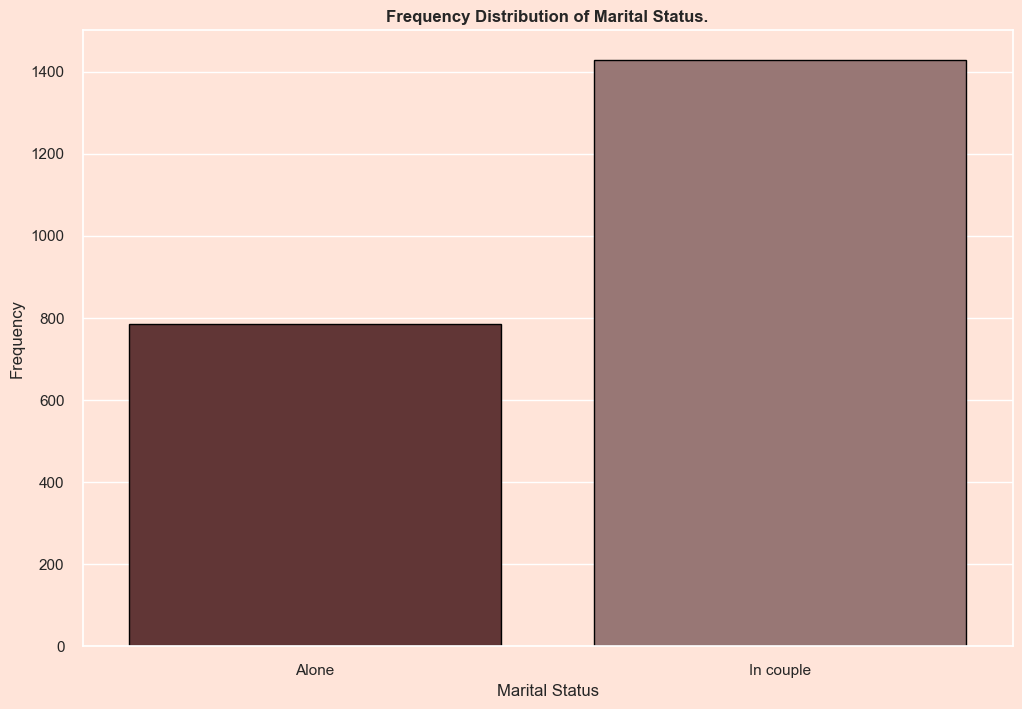

In [66]:
sns.countplot(data=data, x="Marital_status", edgecolor="black")
plt.title("Frequency Distribution of Marital Status.", weight="bold")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.show()

In [67]:
pd.DataFrame({"Count" : data["Marital_status"].value_counts(),
              "Ratio" : round(data["Marital_status"].value_counts(normalize=True),2)*100})

,Count,Ratio
In couple,1429,65.0
Alone,786,35.0



<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:25%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The majority is In couple, 65%. </div>

In [68]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted'],
      dtype='object')

##### 'Children Column'
- sum of kidhome and teenhome columns

In [69]:
pd.DataFrame({"Count" : data["Children"].value_counts(),
              "Ratio" : round(data["Children"].value_counts(normalize=True),2)*100})

,Count,Ratio
1 child,1116,50.0
No child,633,29.0
2 children,416,19.0
3 children,50,2.0


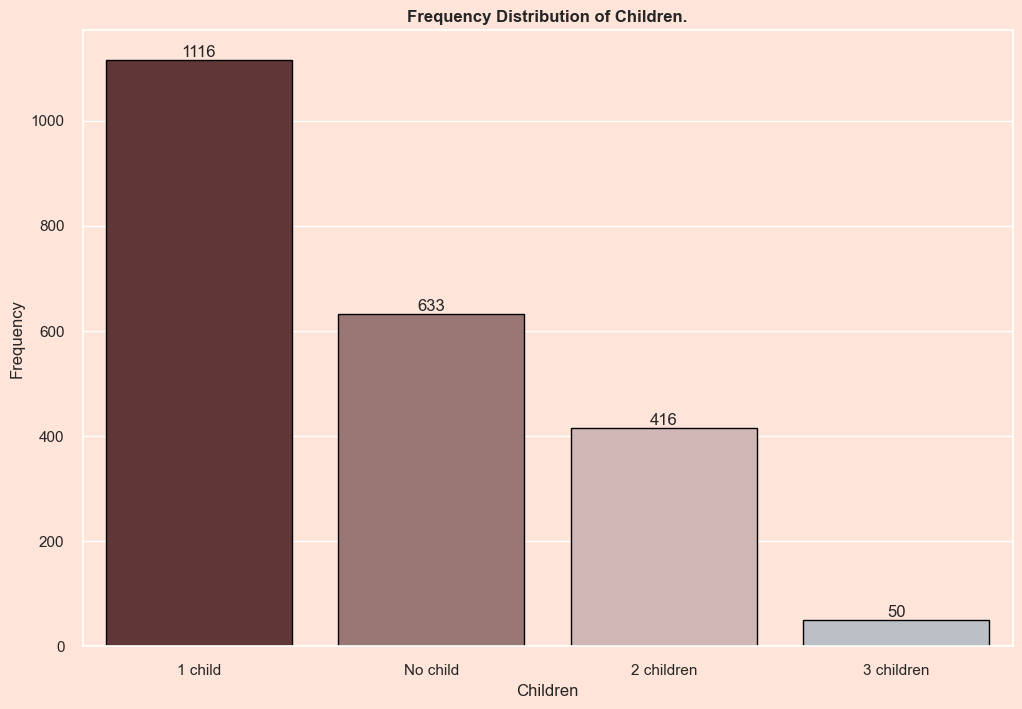

In [70]:
ax = sns.countplot(data=data, x="Children", edgecolor="black",
                   order = data['Children'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Frequency Distribution of Children.", weight="bold")
plt.xlabel("Children")
plt.ylabel("Frequency")
plt.show()


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:25%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> 50% of clients have one child. </div>

In [71]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted'],
      dtype='object')

In [72]:
pd.DataFrame({"Count" : data["Has_child"].value_counts(),
              "Ratio" : round(data["Has_child"].value_counts(normalize=True),2)*100})

,Count,Ratio
Has child,1582,71.0
no child,633,29.0


In [73]:
px.histogram(data,
             x="Has_child",
             color_discrete_sequence=px.colors.qualitative.Antique,
             title= "<b>Visualizing Has Child Feature Frequencies")


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:25%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> 71% of customers have children. </div>

###### 'Campaigns_accepted Column'
- sum of AcceptedCmp

In [74]:
## check data type
data["Campaigns_accepted"].dtype

dtype('int64')

In [75]:
data["Campaigns_accepted"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [76]:
pd.DataFrame({"Count" : data["Campaigns_accepted"].value_counts(),
              "Ratio" : round(data["Campaigns_accepted"].value_counts(normalize=True),3)*100})

,Count,Ratio
0,1756,79.3
1,323,14.6
2,81,3.7
3,44,2.0
4,11,0.5


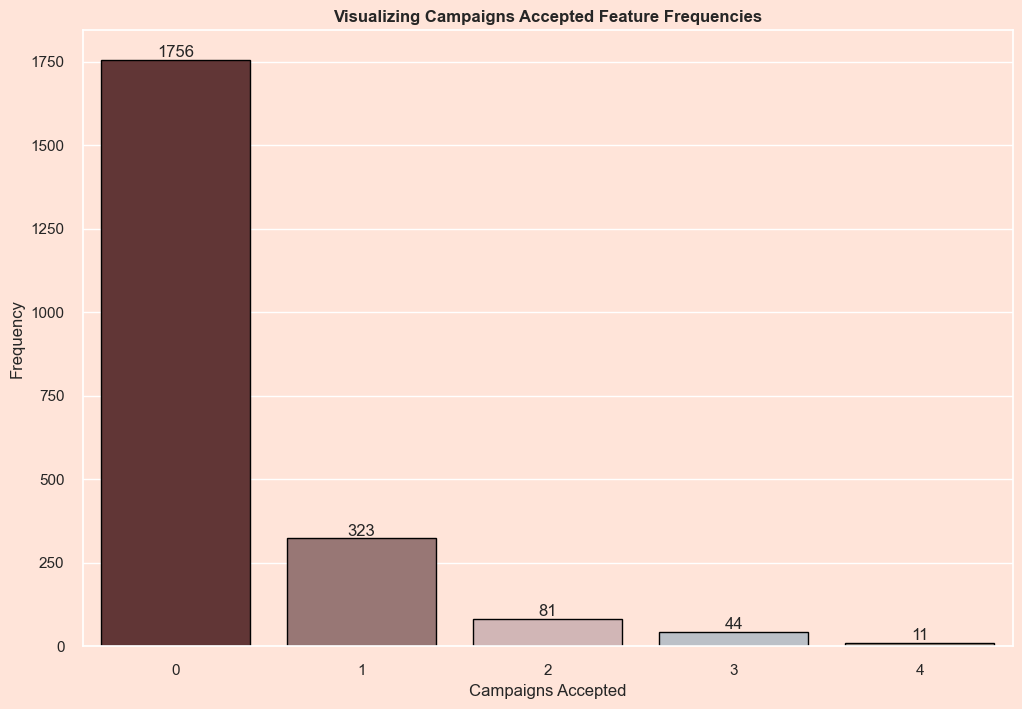

In [77]:
ax = sns.countplot(data=data, x="Campaigns_accepted", edgecolor="black")
for label in ax.containers:
    ax.bar_label(label)
plt.title("Visualizing Campaigns Accepted Feature Frequencies", weight="bold")
plt.xlabel("Campaigns Accepted")
plt.ylabel("Frequency")
plt.show()


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The majority of campaigns are unacceptable, at a rate of 79% . </div>

##### 'Response Column'
-  1 if customer accepted the offer in the last campaign, 0 otherwise

In [78]:
## et's see the unique value
df["Response"].unique() 

array([1, 0], dtype=int64)

In [79]:
pd.DataFrame({"Count" : data["Response"].value_counts(),
              "Ratio" : round(data["Response"].value_counts(normalize=True),3)*100})

,Count,Ratio
0,1882,85.0
1,333,15.0


##### 'Recency Column'
-  Number of days since customer's last purchase

In [80]:
data["Recency"].dtype

dtype('int64')

In [81]:
data["Recency"].describe()

count    2215.000000
mean       49.024379
std        28.949608
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

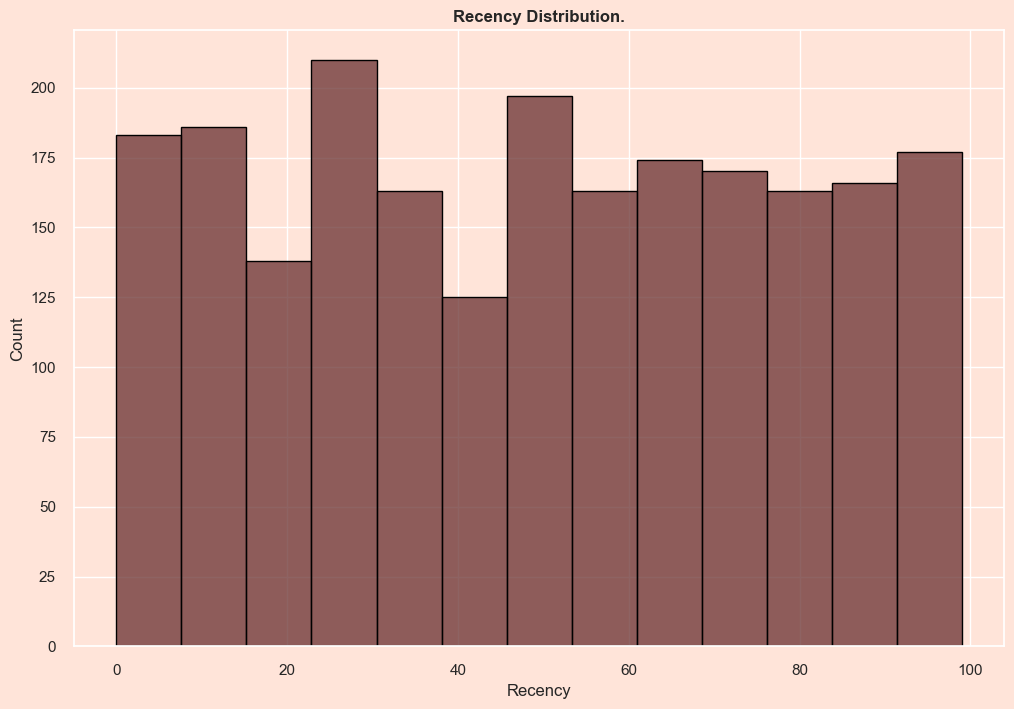

In [82]:
sns.histplot(data=data,
            x="Recency",
            edgecolor='black')
plt.title("Recency Distribution.", weight="bold")
plt.show()

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:29%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Last Purchase in Range 1, 89 Days. </div>

In [83]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted'],
      dtype='object')

##### 'Complain Column'
- 1 if the customer complained in the last 2 years, 0 otherwise

In [84]:
pd.DataFrame({"Count" : data["Complain"].value_counts(),
              "Ratio" : round(data["Complain"].value_counts(normalize=True),3)*100})

,Count,Ratio
0,2194,99.1
1,21,0.9


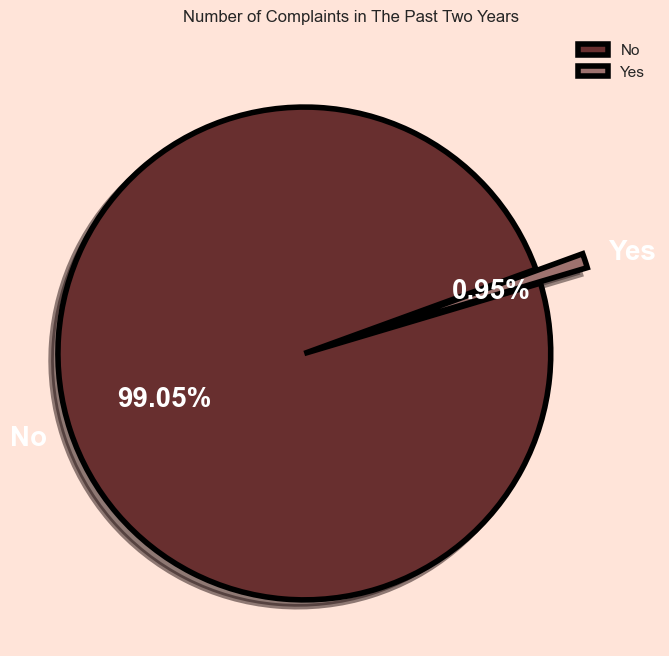

In [85]:
Complain_counts = data["Complain"].value_counts()
plt.pie(Complain_counts.values,
        labels=Complain_counts.index.map({0: "No", 1: "Yes"}),
        explode=[0.2,0],
        shadow=True,
        textprops=dict(size= 20, color= "white", weight="bold"),
        autopct="%.2f%%",
        wedgeprops=dict(edgecolor = "black", linewidth = 4),
        startangle = 20)
plt.title("Number of Complaints in The Past Two Years")
plt.legend(["No", "Yes"])
plt.show() 


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45
                                                 
                                                 
                                                 
                                                 
                                                 
                                                 
                                                 
                                                 %;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> 99% of customers have not complained in the past two years . </div>


##### 'Place'
- ['Web', 'Catalog', 'Store'] 
- Web: Number of purchases made through the company’s website
- Catalog: Number of purchases made using a catalogue
- Store: Number of purchases made directly in stores

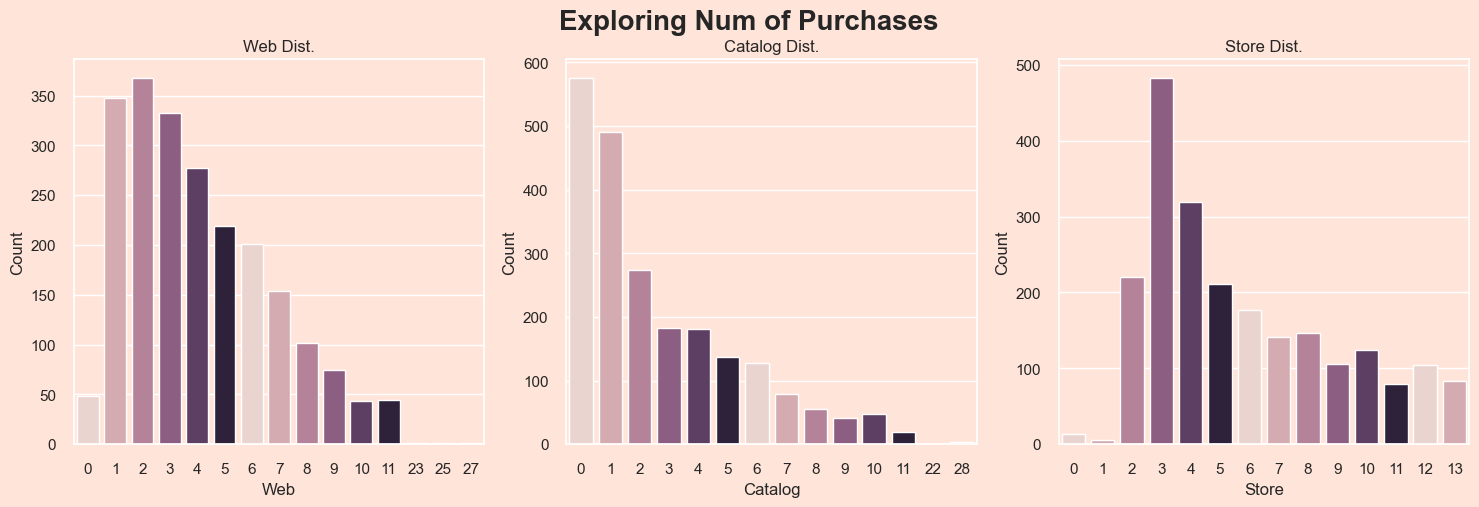

In [86]:
used_cols = ['Web', 'Catalog', 'Store']

fig, ax = plt.subplots(1, 3, figsize = (18,5)) 
plt.suptitle("Exploring Num of Purchases", fontsize=20, weight="bold") 

for i in range(3):
    sns.countplot(ax=ax[i], data=data, x=used_cols[i], palette=sns.cubehelix_palette())
    ax[i].set_title(f"{used_cols[i]} Dist.")
    ax[i].set_ylabel("Count")

plt.show()

In [87]:
data[['Web', 'Catalog', 'Store']].describe()

,Web,Catalog,Store
count,2215.000000,2215.000000,2215.000000
mean,4.085779,2.671783,5.802257
std,2.741473,2.927179,3.250974
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000
50%,4.000000,2.000000,5.000000
75%,6.000000,4.000000,8.000000
max,27.000000,28.000000,13.000000


In [88]:
Purchases = pd.DataFrame(data[['Web', 'Catalog', 'Store']].sum()).rename(columns={0:"Count"})
Purchases

,Count
Web,9050
Catalog,5918
Store,12852



<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:40%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Most purchases are made through the store and web.</div>


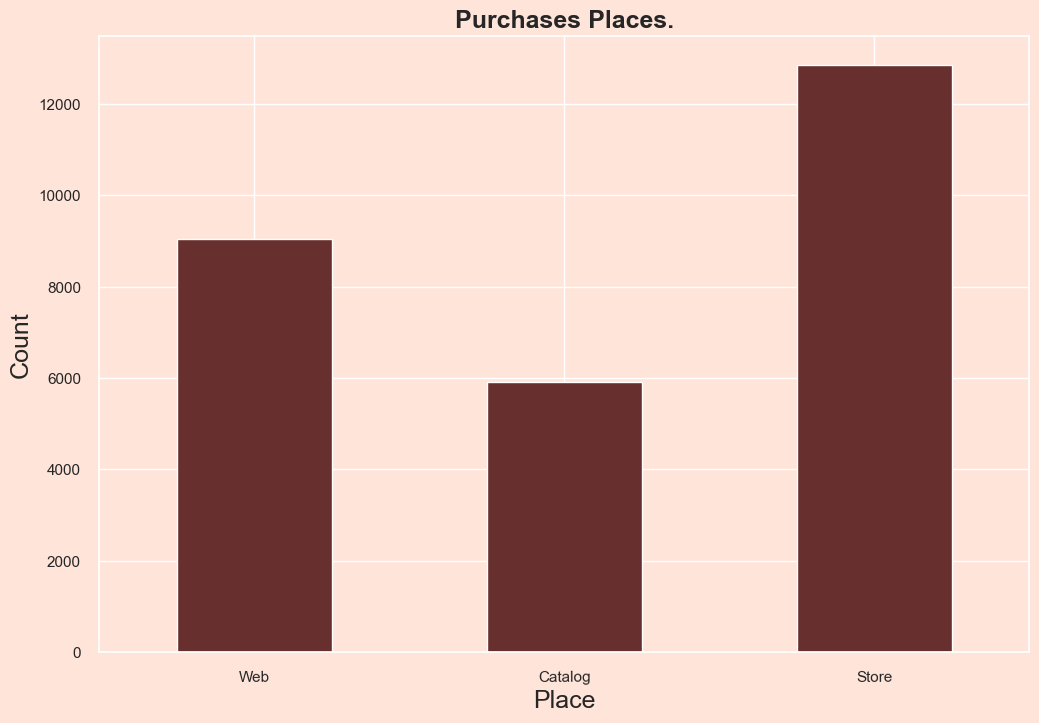

In [89]:
Purchases.plot(kind='bar', legend=False)
plt.title("Purchases places.".title(), fontsize=18, weight="bold")
plt.xticks(rotation=0.45)
plt.xlabel("Place", fontsize=18)
plt.ylabel("Count", fontsize=18)
# Display the plot
plt.show()

##### 'Dt_Customer' 
- Date of customer's enrollment with the company

In [90]:
## month feature creation
data["customer_month"] = data["Dt_customer"].dt.month_name()
## year feature creation
data["customer_year"] = data["Dt_customer"].dt.year
## day feature creation
data["day_name"] = data["Dt_customer"].dt.day_name()

In [91]:
data["customer_month"].value_counts().sort_values(ascending=False)

August       219
May          213
October      210
March        209
January      195
September    191
November     183
April        181
February     177
December     175
June         162
July         100
Name: customer_month, dtype: int64

In [92]:
data["customer_year"].value_counts().sort_values(ascending=False)

2013    1172
2014     553
2012     490
Name: customer_year, dtype: int64


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:30%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> In 2013, we gained many customers.</div>


###### 'Numwebvisitsmonth Column'
- Number of visits to company’s website in the last month

In [93]:
data["Numwebvisitsmonth"].describe()

count    2215.000000
mean        5.318736
std         2.425863
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: Numwebvisitsmonth, dtype: float64

In [94]:
data["Numwebvisitsmonth"].sum()

11781


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:35%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The Total of Num Web Visits Month = 11781.</div>


<a id="1.7"></a>
## <b>3.2 <span style='color:#682F2F'>Bi-variate Analysis & Multivariate analysis</span></b>

#### `1. Is there a relationship between age and annual income? Does income tend to increase or decrease with age?`

In [95]:
corre = data[["Income", "Age"]].corr()
print(f"The Correlation Between Income and Age = {round(corre.loc['Age','Income'],3)}")

The Correlation Between Income and Age = 0.2


In [96]:
def scatter_plot(Data, X, Y, h=None):
    sns.scatterplot(data=Data, x=X, y=Y,  hue=h)
    plt.title(f"Correlation Between {X} and {Y}.")
    plt.xlabel(f"{X}")
    plt.ylabel(f"{Y}")
    plt.show()

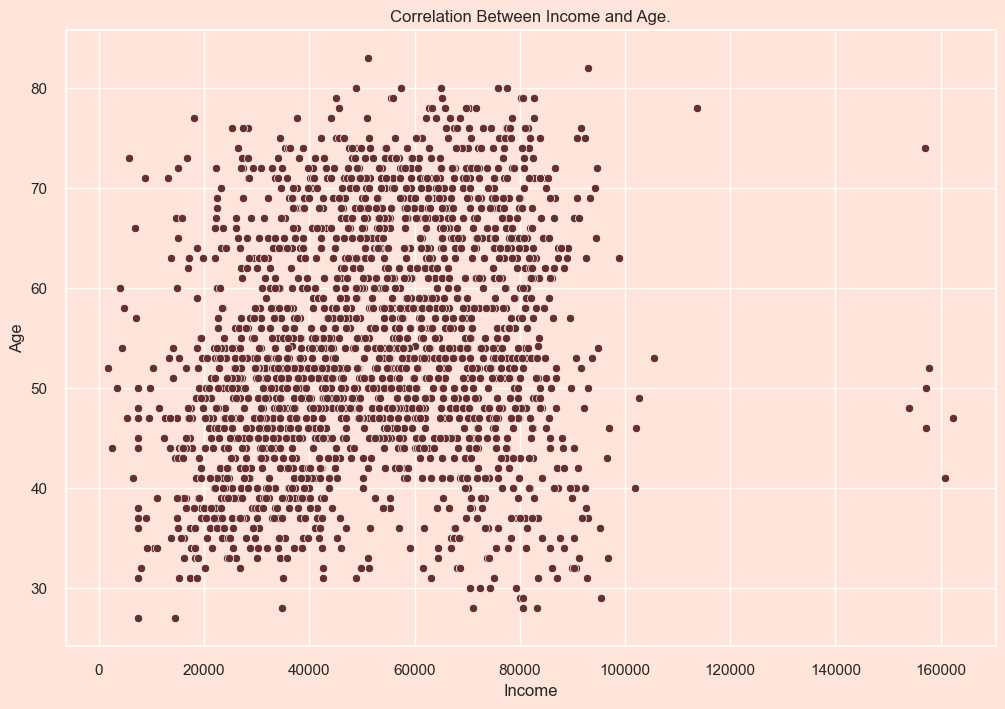

In [97]:
scatter_plot(Data=data, X="Income", Y="Age")


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The Correlation Between (Income, Age) is Weak Positive Corr.</div>


#### `2. Are there differences in purchase preferences between married and single individuals?`

In [98]:
data.groupby('Marital_status')['Spending'].sum().to_frame()

,Spending
Marital_status,
Alone,489525
In couple,855692


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:53%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Obviously, Married Customers Spend More Money Than Single Customers.</div>


In [99]:
products_list = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

In [100]:
l = data.groupby('Marital_status')[products_list].sum()

In [101]:
fig = px.bar(data_frame=l.reset_index(), x='Marital_status',
            y=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'],
            barmode="group", title="<b> Marital Status by Products Purchase",
            color_discrete_sequence=px.colors.sequential.Greys_r)
fig.show()

#### `3. Is there a relationship between education level and annual income?`

In [102]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted',
       'customer_month', 'customer_year', 'day_name'],
      dtype='object')

In [103]:
data.groupby("Education")["Income"].sum().to_frame()

,Income
Education,
Postgraduate,104490067.0
Undergraduate,10623176.0


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:55%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Makes Sense , Postgraduate Customer have more income than Undergraduate .</div>


In [104]:
fig = px.histogram(data_frame=data, x="Income", color="Education", 
                   title= "Income Distribution by Education Category", color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

In [105]:
fig1 = px.box(data_frame=data, x="Education", y="Income",
             title= "<b> Income Distribution by Education Category", color_discrete_sequence=px.colors.qualitative.Antique)
fig2 = px.strip(data, x="Education", y="Income", color_discrete_sequence=px.colors.qualitative.Antique)
all_fig = go.Figure(data=fig1.data + fig2.data, layout=fig1.layout) ## combine
all_fig.show()

#### `4. explore the correlation between different products.`

In [106]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted',
       'customer_month', 'customer_year', 'day_name'],
      dtype='object')

In [107]:
product_corr = data[products_list].corr()
product_corr

,Wines,Fruits,Meat,Fish,Sweets,Gold
Wines,1.000000,0.386977,0.568752,0.397602,0.390178,0.392588
Fruits,0.386977,1.000000,0.547796,0.593407,0.571581,0.396443
Meat,0.568752,0.547796,1.000000,0.573507,0.535048,0.359328
Fish,0.397602,0.593407,0.573507,1.000000,0.583804,0.427056
Sweets,0.390178,0.571581,0.535048,0.583804,1.000000,0.357336
Gold,0.392588,0.396443,0.359328,0.427056,0.357336,1.000000


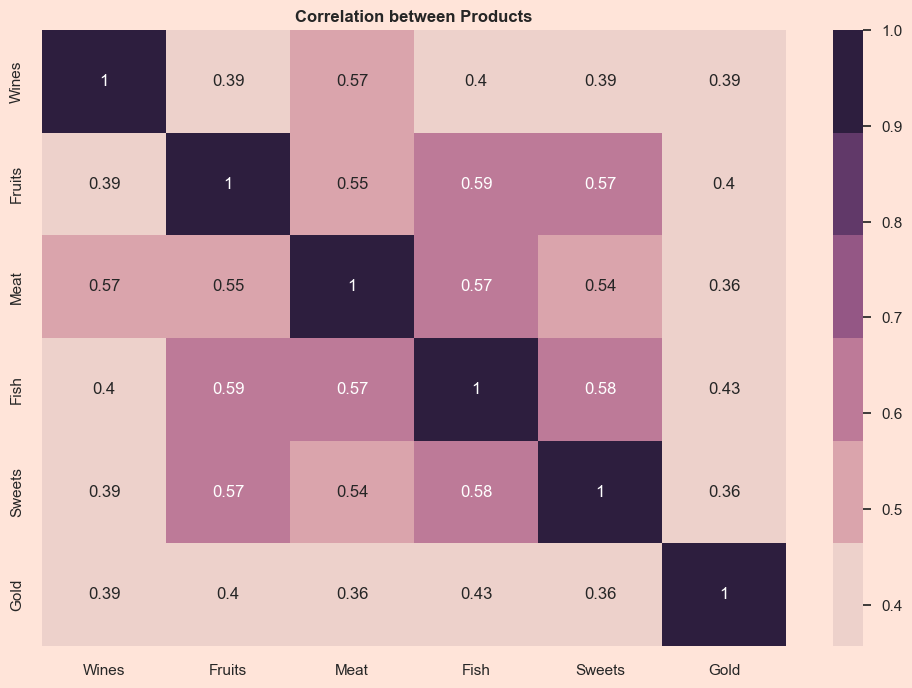

In [108]:
sns.heatmap(product_corr, annot=True, cmap=sns.cubehelix_palette())
plt.title("Correlation between Products", weight="bold")
plt.show()

**There is a relationship between purchasing products and some of them, such as : (Meat, Fish) and (Fish, Fruits)**

#### `5. explore the correlation between Age and Income.`

In [109]:
data[["Age", "Income"]].corr()

,Age,Income
Age,1.000000,0.199855
Income,0.199855,1.000000


In [110]:
px.imshow(data[["Age", "Income"]].corr(), text_auto=True,
         title="<b>Correlation Between Age and Income",  color_continuous_scale=px.colors.qualitative.Antique)

In [111]:
px.scatter(data_frame=data, x="Income", y="Age",
           title="<b>Correlation Between Age and Income",  color_discrete_sequence=px.colors.qualitative.Antique)

**The Correlation between income and age is Weak Positive.**

#### `Divide the data into age groups and compare the income levels within each group.`

In [112]:
## List of bins 
bins = [20, 40, 60 , 80, np.inf]
print(bins)

## Define labels
labels = ['20-40', '40-60', '60-80', 'Over 80']
print(labels)

# Customers Age Group
data["Age_Group"] = pd.cut(data["Age"], bins, labels=labels)

[20, 40, 60, 80, inf]
['20-40', '40-60', '60-80', 'Over 80']


In [113]:
data.groupby("Age_Group")["Income"].sum().sort_values(ascending=False).reset_index()

,Age_Group,Income
0,40-60,61737314.0
1,60-80,39638255.0
2,20-40,13593506.0
3,Over 80,144168.0


**The highest income is for people between the ages of 40-60**

In [114]:
fig = px.histogram(data_frame=data,
       x="Age_Group",
       y="Income",  color="Age_Group", color_discrete_sequence=px.colors.qualitative.bold)
fig.show()

AttributeError: module '_plotly_utils.colors.qualitative' has no attribute 'bold'

#### `6. How does customer spending vary by month?`

In [ ]:
## the average spending score and total purchase amount for each month.
data.groupby("customer_month")["Spending"].agg(["mean","sum"])

In [ ]:
# Create a line plot to visualize the variations in customer spending across months.
fig = px.box(data_frame=data, x="customer_month", y="Spending", color="customer_month", title="<b>Monthly Spending", 
             color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(
    xaxis=dict(title="Month"),
    yaxis=dict(title="Spending Amount")
)
fig.show()

In [ ]:
sns.lineplot(data=data, x="customer_month", y="Spending", ci=False, estimator=sum, color="black")
plt.title("Monthly Spending", weight="bold")
plt.xlabel("Month")
plt.ylabel("Spending Amount")
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> August shows the highest amount, while July exhibits the lowest. </div>


#### `7. Day Vs. Spending`

In [115]:
data.groupby("day_name")["Spending"].sum().sort_values(ascending=False)

day_name
Monday       217036
Friday       213833
Wednesday    209636
Saturday     197177
Sunday       173054
Thursday     167574
Tuesday      166907
Name: Spending, dtype: int64

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:40%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Higher spending on Monday, less spending on Tuesday.</div>

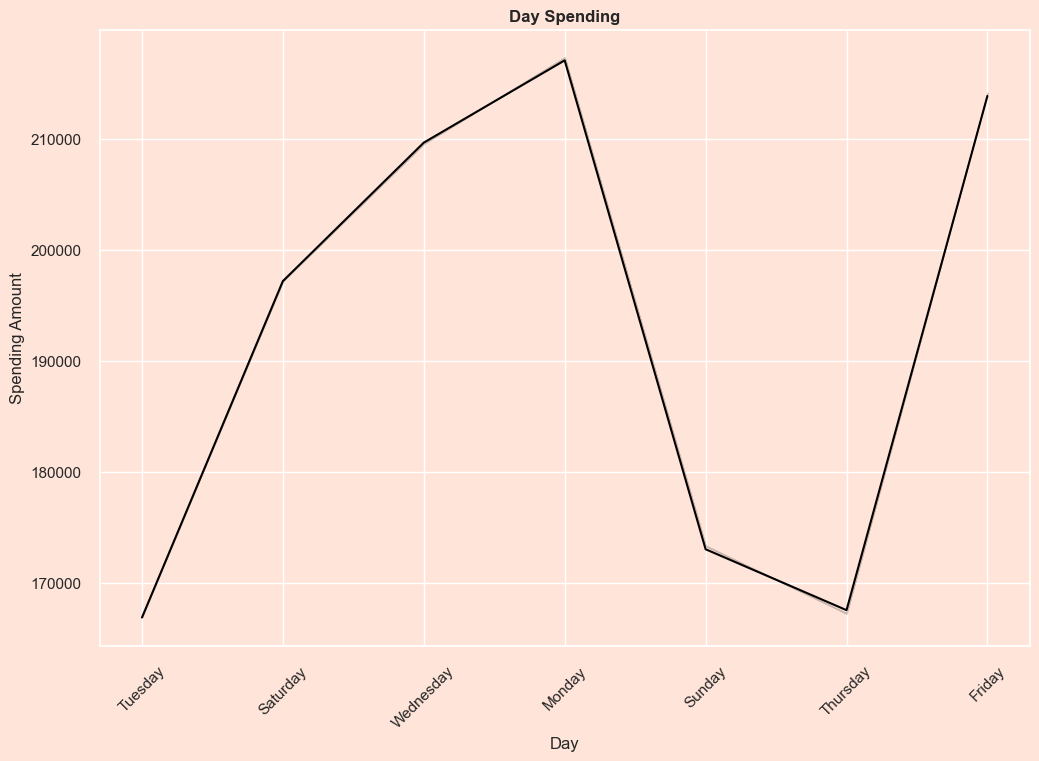

In [116]:
sns.lineplot(data=data, x="day_name", y="Spending", ci=False, estimator=sum, color="black")
plt.title("Day Spending", weight="bold")
plt.xlabel("Day")
plt.ylabel("Spending Amount")
plt.xticks(rotation=45)
plt.show()

#### `8. Income Vs. Spending`

In [117]:
data[["Income", "Spending"]].corr()

,Income,Spending
Income,1.00000,0.79265
Spending,0.79265,1.00000


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> There is a Positive Correlation between Income and Spending.</div>


In [118]:
fig = px.scatter(data_frame=data, x="Income",y="Spending", color="Education",
                 color_discrete_sequence=px.colors.qualitative.Antique,
                 title="<b>Correlation between Income and Spending")
fig.show()

In [119]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted',
       'customer_month', 'customer_year', 'day_name', 'Age_Group'],
      dtype='object')

#### `8. Deals Vs. (day, month, year)`

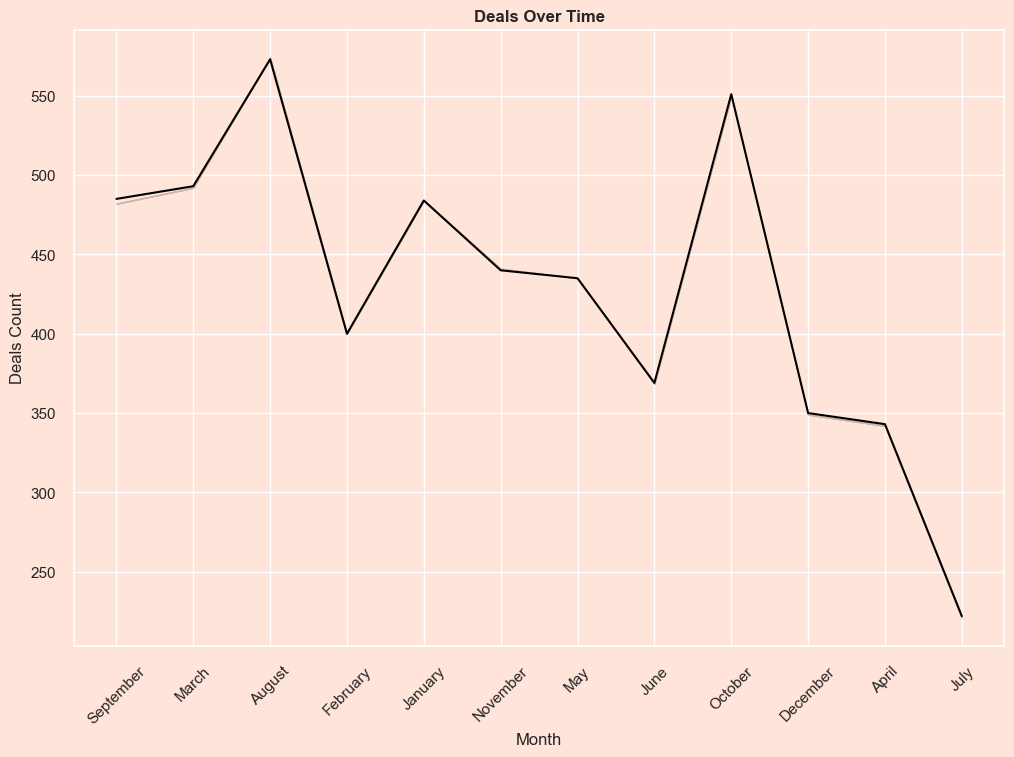

In [120]:
sns.lineplot(data=data, x="customer_month", y="Deals", ci=False, estimator=sum, color="black")
plt.title("Deals Over Time", weight="bold")
plt.xlabel("Month")
plt.ylabel("Deals Count")
plt.xticks(rotation=45)
plt.show()

**The month with the most offers is August and the month with the most spending is August.**
**Let's show the correlation between spending and deals**

In [121]:
data[["Deals", "Spending"]].corr()

,Deals,Spending
Deals,1.000000,-0.065521
Spending,-0.065521,1.000000


In [122]:
fig = px.scatter(data_frame=data, y="Deals", x="Spending",
                 color_discrete_sequence=px.colors.qualitative.Antique,
                 title="<b>Correlation between Deals and Spending")
fig.show()

**There is no correlation between Deals and Spending.**

#### `9. Age Vs. Products`

In [123]:
corr_agg = round(data[products_list+["Age"]].corr(),3).loc["Age",:"Gold"].to_frame()

In [124]:
px.imshow(corr_agg, text_auto=True,
         title="<b>Correlation Between Age and Products",  color_continuous_scale=px.colors.qualitative.Antique)

In [125]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted',
       'customer_month', 'customer_year', 'day_name', 'Age_Group'],
      dtype='object')

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span> Data Preparation for ML Model
</div>

- Label encoding 
- Scaling
- Dimensionality Reduction

In [126]:
## create copy from data
df_final = data.copy()

In [127]:
## Select Categorical Columns 
categorical_cols = df_final.select_dtypes(include="object").columns.to_list()
print(categorical_cols)

['Education', 'Marital_status', 'Children', 'Has_child', 'customer_month', 'day_name']


<a id="1.7"></a>
## <b>4.1 <span style='color:#682F2F'> Encoding </span></b>

**Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.**
- Source : https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

In [128]:
label_encoding = LabelEncoder() ## Create label_encoding object

In [129]:
for col in categorical_cols: 
    df_final[col] = label_encoding.fit_transform(df_final[col]) 

In [130]:
df_final.sample() ## Take a sample

,Education,Marital_status,Income,Dt_customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals,Web,Catalog,Store,Numwebvisitsmonth,Complain,Response,Age,Spending,Seniority,Children,Has_child,Campaigns_accepted,customer_month,customer_year,day_name,Age_Group
1352,0,0,75154.0,2012-09-04,79,543,10,205,160,143,82,1,6,3,6,3,0,1,65.0,1143,11.021918,0,0,0,11,2012,5,60-80


In [131]:
categorical_cols = df_final.select_dtypes(include="object").columns.to_list()
print(f" Categorical columns : {categorical_cols}")

 Categorical columns : []


**Encoding Done**

<a id="1.7"></a>
## <b>4.2 <span style='color:#682F2F'> Scaling The Features</span></b>

**Using RobustScaler : This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).**
- Source : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [132]:
cols_drop = ['Complain', 'Response', 'Campaigns_accepted', "Age_Group", "Dt_customer", "day_name"] ## Select Cols to drop 
df_final.drop(cols_drop, axis=1, inplace=True)

In [133]:
df_final.sample()

,Education,Marital_status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals,Web,Catalog,Store,Numwebvisitsmonth,Age,Spending,Seniority,Children,Has_child,customer_month,customer_year
1982,1,0,67506.0,73,90,38,67,33,36,67,1,4,1,6,3,43.0,331,9.693151,0,0,4,2014


In [134]:
## sclaing 
rob_scaling = RobustScaler() ## Create rob_scaling object
rob_scaling.fit(df_final) ## Compute the median and quantiles to be used for scaling.

RobustScaler()

In [135]:
## Create scaled_data dataframe
## Contains data after scaling
scaled_data = pd.DataFrame(rob_scaling.transform(df_final),columns= df_final.columns)

In [136]:
scaled_data.sample(5) ## show sample from data after scaling

,Education,Marital_status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals,Web,Catalog,Store,Numwebvisitsmonth,Age,Spending,Seniority,Children,Has_child,customer_month,customer_year
261,0.0,0.0,0.317200,-0.94,-0.016632,-0.258065,-0.115473,-0.127660,-0.18750,-0.255319,0.0,0.00,0.00,-0.2,-0.25,-0.277778,-0.169561,-0.601719,0.000000,0.0,-0.428571,1.0
516,0.0,0.0,-0.066831,0.40,0.064449,0.064516,-0.004619,0.382979,0.59375,0.978723,2.0,0.00,-0.25,0.6,0.00,0.555556,0.014300,-0.335244,0.333333,0.0,0.428571,0.0
347,0.0,0.0,0.820558,0.76,1.166320,5.000000,3.464203,4.255319,4.84375,0.765957,-0.5,0.00,1.25,1.0,-1.00,0.722222,1.793667,0.813754,1.000000,1.0,0.714286,-1.0
344,0.0,0.0,0.514682,-0.86,0.802495,1.806452,3.311778,1.531915,3.75000,0.489362,-0.5,-0.25,0.25,0.6,-1.25,0.055556,1.300306,0.598854,1.000000,1.0,-0.571429,-1.0
609,0.0,-1.0,0.630214,0.06,0.935551,0.870968,0.466513,0.978723,0.28125,0.212766,-0.5,0.00,0.25,0.2,-1.25,1.166667,0.553626,-0.699140,1.000000,1.0,0.142857,1.0


In [137]:
print(len(scaled_data.columns.tolist()))

22


<a id="1.7"></a>
## <b>4.2 <span style='color:#682F2F'> Dimensionality Reduction </span></b>
**Using PCA**
- `Dimensionality Reduction` : **Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset.**
- `PCA` : **Linear dimensionality reduction using Singular Value Decomposition.**

In [138]:
deco_pca = PCA(n_components=None)
deco_pca.fit(scaled_data)
data_pca = deco_pca.transform(scaled_data)

In [139]:
len(deco_pca.explained_variance_ratio_)

22

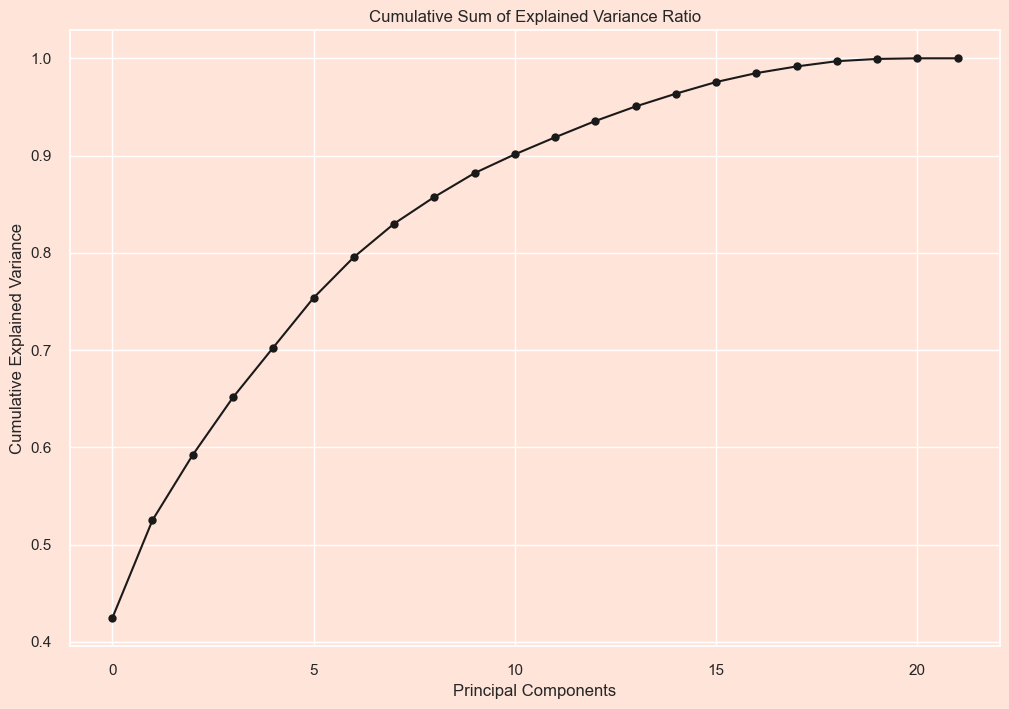

In [140]:
cumsum_pca = np.cumsum(deco_pca.explained_variance_ratio_)
plt.plot(cumsum_pca, linestyle='-', marker='o', color="k")
plt.title('Cumulative Sum of Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()      

**From the chart above, I chose Principal Component = 11**

In [141]:
deco_pca = PCA(n_components=11)
deco_pca.fit(scaled_data)
data_pca_final = deco_pca.transform(scaled_data)

In [142]:
len(deco_pca.explained_variance_ratio_), sum(deco_pca.explained_variance_ratio_)

(11, 0.9012358895437163)

In [143]:
columns_name = ["col"+str(i) for i in range(1,12)] ## list comprehension Contains column names
data_pca_final = pd.DataFrame(data_pca_final, columns=(columns_name))

In [144]:
data_pca_final.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11
0,4.679482,0.818445,-0.811301,-0.470864,-0.482560,-1.073886,1.080451,-0.132266,0.804951,0.154345,0.170197
1,-2.143009,-0.978834,0.423638,0.121151,0.206887,0.813757,0.184513,-0.207483,0.775722,0.438854,-0.113679
2,1.440350,-0.488751,0.180803,0.431912,-0.445780,0.011351,0.748987,-1.351057,-0.652356,0.166712,0.556251
3,-2.175752,-0.961360,-0.176838,0.174282,0.089113,0.629093,0.299922,0.518280,-0.784210,0.179893,0.230192
4,-0.137429,0.141801,-0.383903,-0.514792,-0.376567,1.643434,0.620036,0.641796,-0.308710,-1.100175,-0.084895


<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700">5 <span style='color:#CDA63A'>|</span> Clustering
</div>

<a id="1.7"></a>
## <b>5.1 <span style='color:#682F2F'> KMeans Algorithm </span></b>

#### 5.1.1 Plot Elbow Method Using KElbowVisualizer From yellowbrick Library
**Source : https://pypi.org/project/yellowbrick/**

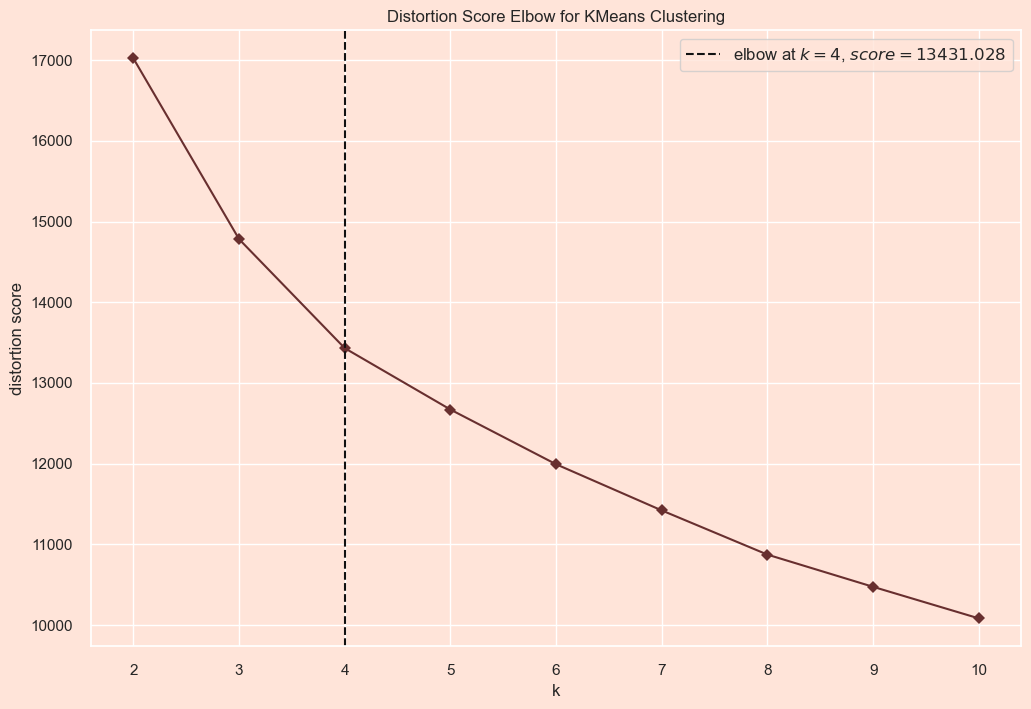

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [145]:
best_k = KElbowVisualizer(KMeans(), k=10, timings=False)
best_k.fit(data_pca_final)
best_k.show()

**Best K According to Elbow Method = 4**

#### 5.1.2 Train the Algorithm


In [146]:
kmeans_cluster = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=50) ## Create instance from kmeans 
kmeans_cluster.fit(data_pca_final) 

KMeans(n_clusters=4, n_init=50, random_state=42)

In [147]:
kmeans_cluster.inertia_

13431.027575163273

In [148]:
cluster_labels = kmeans_cluster.predict(data_pca_final)

In [149]:
data_pca_final["cluster_labels"] = cluster_labels
data_pca_final["cluster_labels"].value_counts()

1    1014
0     516
2     421
3     264
Name: cluster_labels, dtype: int64

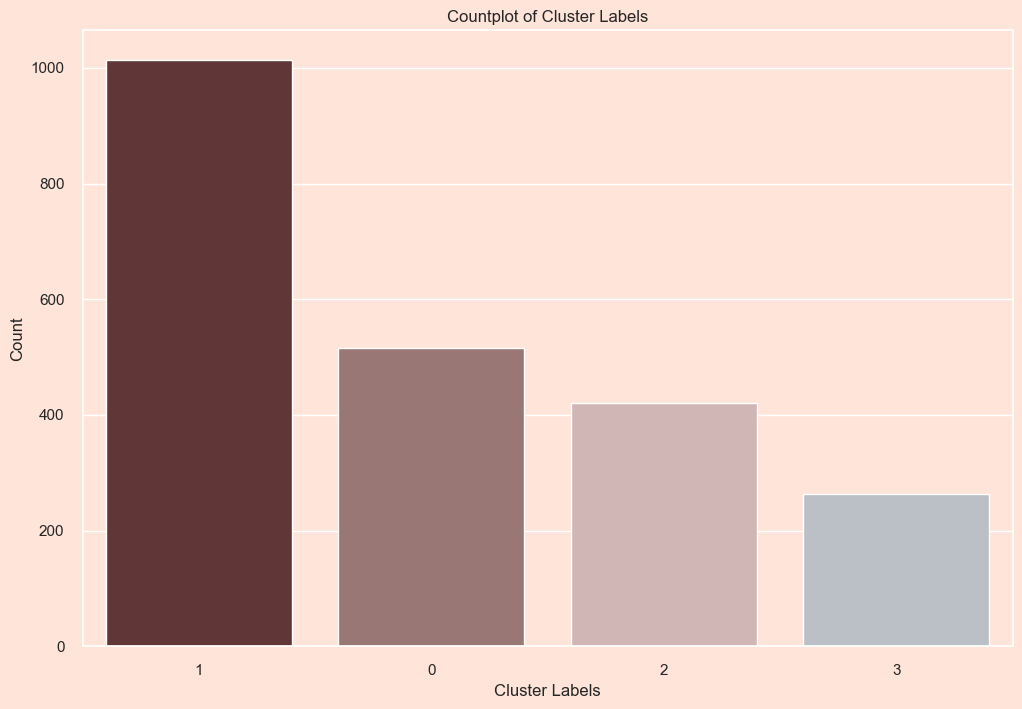

In [150]:
## Count plot for Cluster labels 
sns.countplot(data=data_pca_final, x="cluster_labels", 
              order=data_pca_final["cluster_labels"].value_counts().index)

# Set the title and axis labels
plt.title('Countplot of Cluster Labels')
plt.xlabel('Cluster Labels')
plt.ylabel('Count')

plt.show()

In [151]:
clus_centroids = kmeans_cluster.cluster_centers_ ## Location of centroids

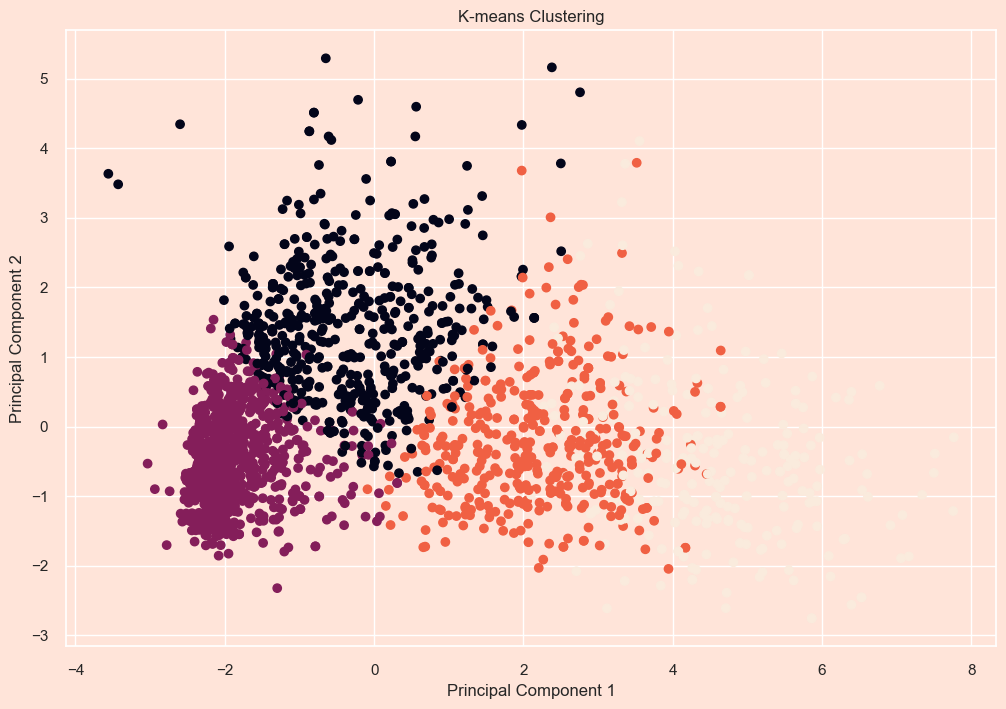

In [152]:
plt.scatter(data_pca_final.iloc[:, 0], data_pca_final.iloc[:, 1], c=cluster_labels) 

# Set the title and axis labels
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

### `Comparing the Clusters with Annual Income and Spending`

In [153]:
df_final["cluster_labels"] = data_pca_final["cluster_labels"]

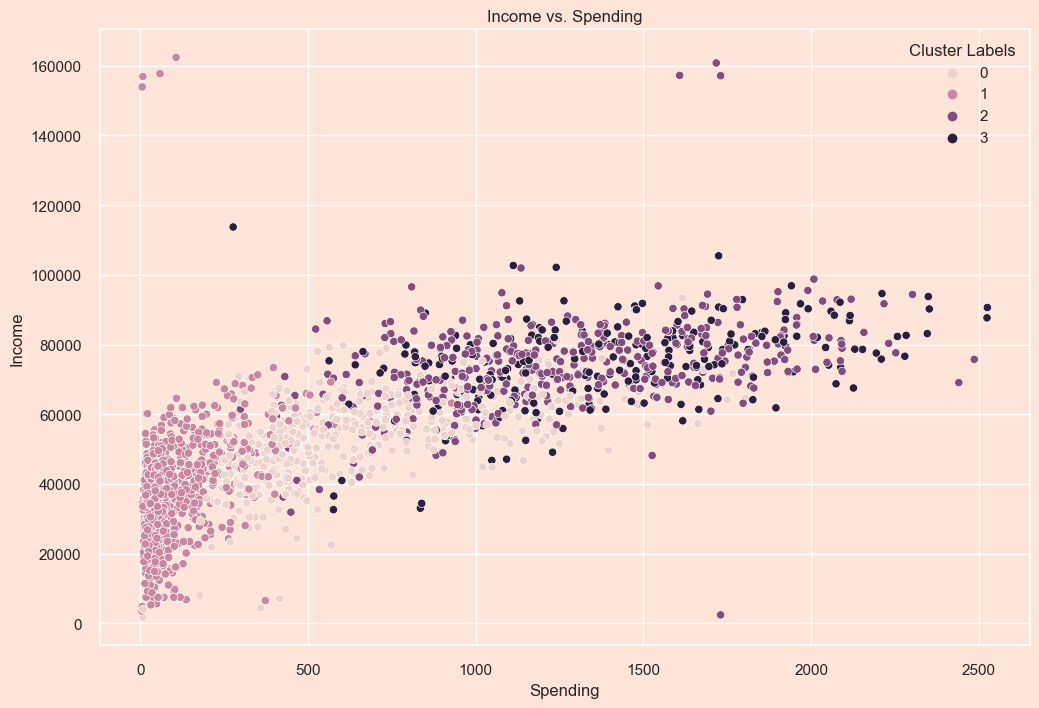

In [154]:
## scatter plot
scatter_plot = sns.scatterplot(data=df_final, y="Income", x="Spending", hue="cluster_labels")

## Customize the plot
scatter_plot.set_title("Income vs. Spending")
scatter_plot.set_xlabel("Spending")
scatter_plot.set_ylabel("Income")
scatter_plot.legend(title="Cluster Labels")

plt.show()

**From the above chart, We Have 4 Clusters**

- `Cluster 0` : **Average Spenging and Average Income**

- `Cluster 1` : **Low Spending and Low Income**

- `Cluster 2` : **High Spending and High Income**

- `Cluster 3` : **High Spending and High Income**

- `"Cluster 2 and 3 are almost the same"`

In [155]:
df_final.groupby("cluster_labels")[["Income","Spending"]].mean()

,Income,Spending
cluster_labels,,
0,54481.282946,663.517442
1,35639.106509,99.386588
2,73996.767221,1265.914489
3,74659.878788,1398.159091


<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:120%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700"> If you find the notebook helpful, please give it an upvote. If you have any comments, please let me know, and I'll be happy.
</div>

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:150%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700"> Done ✌
</div>